# Plotting Article Top 10 Words


In [2]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
cleanlist = []
fullWordList = []

data = pd.read_csv('articleCleanedText.csv')


In [4]:
data.head()

,Unnamed: 0,ArticleText,PublishDate,CleanedArticleText
0,0,Our live coverage of the coronavirus outbreak ...,2020-02-01,"['end', 'today', 'people', 'mainland', 'end', ..."
1,1,Please click here to read more live updates on...,2020-02-02,"['update', 'field', 'departure', 'assistance',..."
2,2,Our live coverage of the Wuhan coronavirus out...,2020-02-03,"['hospital', 'statement', 'isolation', 'home',..."
3,3,Our live coverage of the coronavirus outbreak ...,2020-02-04,"['health', 'people', 'death', 'toll', 'people'..."
4,4,Our live coverage of the coronavirus outbreak ...,2020-02-05,"['number', 'case', 'increase', 'end', 'day', '..."


In [5]:
data["CleanedArticleText"].head()

0    ['end', 'today', 'people', 'mainland', 'end', ...
1    ['update', 'field', 'departure', 'assistance',...
2    ['hospital', 'statement', 'isolation', 'home',...
3    ['health', 'people', 'death', 'toll', 'people'...
4    ['number', 'case', 'increase', 'end', 'day', '...
Name: CleanedArticleText, dtype: object

In [6]:
nlp = spacy.load('en')
cleanedArticleString = ''

In [7]:
# for i in range(len(data))
for i in range(len(data)):
    dataAfterLemmaFilter = []
    cleanArticleVar = data.loc[i, "CleanedArticleText"]
    doc = nlp(cleanArticleVar)
    
    if cleanArticleVar != '':
        for token in doc:
            dataAfterLemmaFilter.append(token.lemma_)

        removelist = ['[', ']', '\'', ',']

        for item in dataAfterLemmaFilter:
            if item not in removelist:
                cleanlist.append(item)


In [22]:
for word in cleanlist:
    cleanedArticleString = cleanedArticleString + ' ' + word

In [23]:
# I created a function just because it seemed easier to reuse in the future, 
def plotTop10Words(wordcount_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in wordcount_data:
        total_counts += t.toarray()[0]

    count_dictionary = (zip(words, total_counts))
    count_dictionary = sorted(count_dictionary, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dictionary]
    counts = [w[1] for w in count_dictionary]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(10, 10 / 1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Count of Words')
    plt.show()

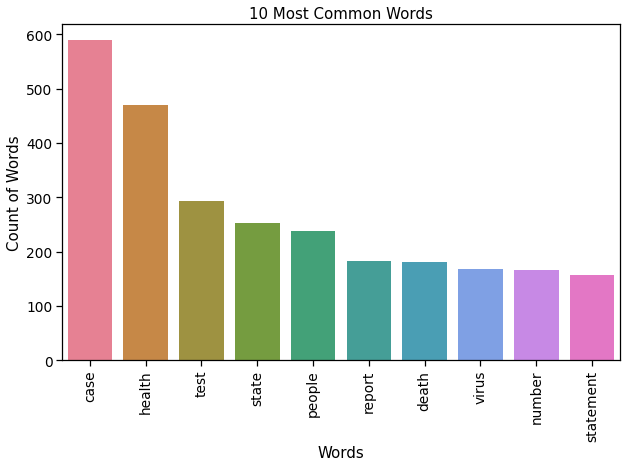

In [24]:
count_vectorizer = CountVectorizer(stop_words='english')
wordcount_data = count_vectorizer.fit_transform(data['CleanedArticleText'])
# Plot the top 10 most common words
plotTop10Words(wordcount_data, count_vectorizer)

# Start of Topic Modeling

In [25]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn library
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# create a function that uses the count_vectorizer initalized for the top 10 words plot to find and print topics 
# then fit the lda model to the data
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Set the number of topics and number of words
number_topics = 5
number_words = 10
# Initialize and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [26]:
# Print the topics found by LDA model
print("Topics found: ")
print_topics(lda, count_vectorizer, number_words)

Topics found: 

Topic #0:
health test state case week care time country report day

Topic #1:
test state health statement hospital day people case order city

Topic #2:
case health people state number week work city report country

Topic #3:
health case people death virus contact mainland day screening ship

Topic #4:
case health test state ship people passenger death number report


In [28]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./CoronaVirusArticleTopics_'+str(number_topics))

# 
LDAvis_Prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_Prepared, f)
        
# load the pre-prepared pyLDAvis data from disk and write it to an HTML file for future use
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_Prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_Prepared, './CoronaVirusArticleTopics_'+ str(number_topics) +'.html')

CPU times: user 964 ms, sys: 24.1 ms, total: 988 ms
Wall time: 2.15 s


In [30]:
# View the finished product
from IPython.display import HTML

HTML(filename="CoronaVirusArticleTopics_5.html")